# Media Usage and Sleep Quality

Based off an Undergrad Project I took in Community College in late 2019 in my Psychology course, PSYC 255: Introduction to Psychological Research where we studied the association between Media Usage (specifically TV) and its effects on Sleep Quality.

## Documentation

### Overview of the Past Research Project and Prior Hypothesis:
**Research Question**: This research study explored the association between watching media, specifically television, and its effects on sleep quality. Using a custom survey, our team collected data from a sample of students (n=21) from our Psychology class. 

**Hypothesis**: *We predicted that increased media and television usage would contribute to a lower quality of sleep.*

### Current Hypothesis and Updated Information:
**Research Question**: This new updated Data Project is still exploring the same association between Media Usage and Sleep Quality. The only difference is the mathematical data and the analysis sections. The datasets I will be using are the same ones given from that course. 

**Hypothesis**: *In similaritiy to the previous work, I predicted that increased media and television usage would contribute to a lower quality of sleep.*

### Ethics and Privacy

**Do I have permisssion to use this data?** As all of the data I have is from an open-ended survey I had conducted in Undergrad, I do not see a problem with using it for this project.

**Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis?** All of the data collected was in a very small class and in the form of a survey. Everyone in my class took the survey so we had about n=21 students participate. There was no randomization or any other form of selection techniques. There is a high chance that this data is no longer useful, as it was also prior to the COVID-19 Pandemic. 

**What will you be doing with this data?** I do not intend to ever use this project for monetary use, this is strictly for educational purposes only.

# Setup:

In [1]:
# First make sure to have all packages installed on device (pip install pandas, numpy, seaborn, matplotlib, and etc)
# import all packages after installing pip
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2, style="white")
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import pyproj as pyproj
import re
import scipy.stats as stats
from scipy.stats import normaltest, ttest_ind
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import functools
from statsmodels.stats.multitest import multipletests
# Our Warnings when importing code will make it harder to concentrate on what is important
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning:

## Survey Data

First we will focus on cleaning and organizing the already-obtained data I gathered in 2019 on my Survey in that class. From there we will do analyses on the data we gathered and see if there's any significance in the associations!

In [2]:
# importing data into Pandas
survey_data = ['./datasets/SurveyData.csv']
df = pd.read_csv('./datasets/SurveyData.csv')
df.info()
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   PARTICIPANT #                         21 non-null     int64 
 1   # of TVs                              21 non-null     object
 2   Preferred Method                      21 non-null     object
 3   Hours of TV                           21 non-null     object
 4   Time of Day                           21 non-null     object
 5   Activities while Watching TV          21 non-null     object
 6   Genres                                21 non-null     object
 7   Situations to watch TV                21 non-null     object
 8   How has TV affected your mood?        21 non-null     object
 9   How much has TV troubled you?         21 non-null     object
 10  Bedtime                               21 non-null     object
 11  HRS of Sleep                      

,PARTICIPANT #,# of TVs,Preferred Method,Hours of TV,Time of Day,Activities while Watching TV,Genres,Situations to watch TV,How has TV affected your mood?,How much has TV troubled you?,Bedtime,HRS of Sleep,How long does it take to fall asleep,# of Wakeup Times,# of Times per Week,Sleep Quality?,How has sleep affected your mood?,How has sleep troubled you?
0,1,3-5,Laptop/Desktop,1-2,Night,Relax,Horror; Indie; Romance Comedy,Bed,Little,Not at all,12-2AM,7-9,<15,0,0,Great,Little,Little
1,2,1-2,Laptop/Desktop; Mobile Device/Cellphone,0,Afternoon,Other,Comedy; Horror; Crime,Other,Much,Somewhat,12-2AM,3-6,31-45,1-2,6-7,Very Poor,Very Much,Very Much
2,3,1-2,TV,3-5,Afternoon,Eat; Sit; Workout; Relax,Comedy; Horror,Study Break; Meal,Little,Not at all,12-2AM,3-6,15-30,1-2,3-5,Good,Somewhat,Little
3,4,1-2,TV,3-5,Afternoon,Relax,Romance,Bed,Much,Somewhat,10-11PM,3-6,15-30,0,1-2,Average,Very Much,Much


## Quick Problem with the Data

For those of you following, the problem with this Dataset is that some of the answers do not have ints we can analyze, rather they are objects/character values. These values being some sort of ranges. To mediate this concern, we will do the following with ALL ranged data points: Finding the Midpoint. This way, although we lose the low and high bound, we can analyze the data and still have it work in the long-run fairly.

In [3]:
# selecting which Columns/Rows we need to convert

selected_cols = ["# of TVs", "Hours of TV", "HRS of Sleep", "How long does it take to fall asleep", "# of Wakeup Times", "# of Times per Week"]
df_copy = df.copy()

In [4]:
# converting all ranges to their Midpoints

def range_to_midpoint(x):
    if isinstance(x, str):
        x = x.strip()  # remove extra spaces if any
        
        # Handle "<15" style values
        if x.startswith("<"):
            return float(x[1:])   # takes everything after "<"
        
        # Handle ranges like "1-2"
        if "-" in x:
            low, high = map(int, x.split("-"))
            return (low + high) / 2
        
        # Handle single numbers stored as strings
        if x.isdigit():
            return float(x)
    
    try:
        return float(x)  # if it's already numeric
    except:
        return None      # fallback for blanks/invalids
        

df_copy[selected_cols] = df_copy[selected_cols].applymap(range_to_midpoint)

df_copy.head(4)

,PARTICIPANT #,# of TVs,Preferred Method,Hours of TV,Time of Day,Activities while Watching TV,Genres,Situations to watch TV,How has TV affected your mood?,How much has TV troubled you?,Bedtime,HRS of Sleep,How long does it take to fall asleep,# of Wakeup Times,# of Times per Week,Sleep Quality?,How has sleep affected your mood?,How has sleep troubled you?
0,1,4.0,Laptop/Desktop,1.5,Night,Relax,Horror; Indie; Romance Comedy,Bed,Little,Not at all,12-2AM,8.0,15.0,0.0,0.0,Great,Little,Little
1,2,1.5,Laptop/Desktop; Mobile Device/Cellphone,0.0,Afternoon,Other,Comedy; Horror; Crime,Other,Much,Somewhat,12-2AM,4.5,38.0,1.5,6.5,Very Poor,Very Much,Very Much
2,3,1.5,TV,4.0,Afternoon,Eat; Sit; Workout; Relax,Comedy; Horror,Study Break; Meal,Little,Not at all,12-2AM,4.5,22.5,1.5,4.0,Good,Somewhat,Little
3,4,1.5,TV,4.0,Afternoon,Relax,Romance,Bed,Much,Somewhat,10-11PM,4.5,22.5,0.0,1.5,Average,Very Much,Much


In [5]:
# Let's rename the Columns for easier access + Remove PARTICIPANT # because it's redundant


df_copy.drop("PARTICIPANT #", axis=1, inplace=True)
df_renamed = df_copy.rename(columns = {"# of TVs": "TV Count", "Preferred Method": "Media Method", "Hours of TV": "Hrs of TV", "Activities while Watching TV": "Concurrent Activities", 
                                       "Situations to watch TV": "Media Reasons", "How has TV affected your mood?": "Mood after Media Usage", "How much has TV troubled you?": "Consequences of Media Usage", 
                                       "HRS of Sleep": "Hrs of Sleep", "How long does it take to fall asleep": "How Fast till Sleep", "# of Wakeup Times": "Wakeup Count", "# of Times per Week": "Weekly Wakeup Count",
                                       "Sleep Quality?": "Sleep Quality", "How has sleep affected your mood?": "Mood after Sleep", "How has sleep troubled you?": "Consequences of Sleeping"})
df_renamed.head(4)

,TV Count,Media Method,Hrs of TV,Time of Day,Concurrent Activities,Genres,Media Reasons,Mood after Media Usage,Consequences of Media Usage,Bedtime,Hrs of Sleep,How Fast till Sleep,Wakeup Count,Weekly Wakeup Count,Sleep Quality,Mood after Sleep,Consequences of Sleeping
0,4.0,Laptop/Desktop,1.5,Night,Relax,Horror; Indie; Romance Comedy,Bed,Little,Not at all,12-2AM,8.0,15.0,0.0,0.0,Great,Little,Little
1,1.5,Laptop/Desktop; Mobile Device/Cellphone,0.0,Afternoon,Other,Comedy; Horror; Crime,Other,Much,Somewhat,12-2AM,4.5,38.0,1.5,6.5,Very Poor,Very Much,Very Much
2,1.5,TV,4.0,Afternoon,Eat; Sit; Workout; Relax,Comedy; Horror,Study Break; Meal,Little,Not at all,12-2AM,4.5,22.5,1.5,4.0,Good,Somewhat,Little
3,1.5,TV,4.0,Afternoon,Relax,Romance,Bed,Much,Somewhat,10-11PM,4.5,22.5,0.0,1.5,Average,Very Much,Much


## Converting Likert Scale answers to 1-5

### TV Quality/Mood

Not at All: 1
Little: 2
Somewhat: 3 (NEUTRAL)
Much: 4
Very Much: 5

### Sleep Quality/Mood

Very Poor: 1
Poor: 2
Average: 3 (NEUTRAL)
Good: 4
Great: 5


In [6]:
# Creating 2 Dictionaries

likert_map_1 = {
    "Not at all": 1,
    "Little": 2,
    "Somewhat": 3,
    "Much": 4,
    "Very Much": 5
}

likert_map_2 = {
    "Very Poor": 1,
    "Poor": 2,
    "Average": 3,
    "Good": 4,
    "Great": 5
}

In [7]:
# Apply mapping to the specific columns 

df_renamed_copy = df_renamed.copy()

likert_cols_1 = ["Mood after Media Usage", "Consequences of Media Usage", "Mood after Sleep", "Consequences of Sleeping"]

likert_cols_2 = ["Sleep Quality"]

df_renamed_copy[likert_cols_1] = df_renamed_copy[likert_cols_1].replace(likert_map_1)
df_renamed_copy[likert_cols_2] = df_renamed_copy[likert_cols_2].replace(likert_map_2)

df_renamed_copy.head(4)

,TV Count,Media Method,Hrs of TV,Time of Day,Concurrent Activities,Genres,Media Reasons,Mood after Media Usage,Consequences of Media Usage,Bedtime,Hrs of Sleep,How Fast till Sleep,Wakeup Count,Weekly Wakeup Count,Sleep Quality,Mood after Sleep,Consequences of Sleeping
0,4.0,Laptop/Desktop,1.5,Night,Relax,Horror; Indie; Romance Comedy,Bed,2,1,12-2AM,8.0,15.0,0.0,0.0,5,2,2
1,1.5,Laptop/Desktop; Mobile Device/Cellphone,0.0,Afternoon,Other,Comedy; Horror; Crime,Other,4,3,12-2AM,4.5,38.0,1.5,6.5,1,5,5
2,1.5,TV,4.0,Afternoon,Eat; Sit; Workout; Relax,Comedy; Horror,Study Break; Meal,2,1,12-2AM,4.5,22.5,1.5,4.0,4,3,2
3,1.5,TV,4.0,Afternoon,Relax,Romance,Bed,4,3,10-11PM,4.5,22.5,0.0,1.5,3,5,4


## Converting Bedtimes to 24 Hour + Midpoint
This is for ease of data later down the line...

In [8]:
def bedtime_to_24h(x):
    if pd.isna(x): 
        return np.nan
    
    x = x.strip().upper()
    
    # Handle ranges like "10-11PM" or "12-2AM"
    if "-" in x:
        # Extract the two parts and the suffix (AM/PM)
        match = re.match(r"(\d{1,2})(?:[:.]?(\d{2}))?-(\d{1,2})(?:[:.]?(\d{2}))?([AP]M)", x)
        if match:
            h1, m1, h2, m2, suffix = match.groups()
            h1, h2 = int(h1), int(h2)
            m1, m2 = int(m1) if m1 else 0, int(m2) if m2 else 0
            
            # Convert to 24h
            if suffix == "AM":
                h1 = 0 if h1 == 12 else h1
                h2 = 0 if h2 == 12 else h2
            elif suffix == "PM":
                h1 = 12 if h1 == 12 else h1 + 12
                h2 = 12 if h2 == 12 else h2 + 12
            
            t1 = h1 + m1/60
            t2 = h2 + m2/60
            return (t1 + t2) / 2

df_renamed_copy["Bedtime"] = df_renamed_copy["Bedtime"].apply(bedtime_to_24h)

df_renamed_copy = df_renamed_copy.rename(columns = {"Bedtime":"Bedtime24"})
df_renamed_copy.head(4)

,TV Count,Media Method,Hrs of TV,Time of Day,Concurrent Activities,Genres,Media Reasons,Mood after Media Usage,Consequences of Media Usage,Bedtime24,Hrs of Sleep,How Fast till Sleep,Wakeup Count,Weekly Wakeup Count,Sleep Quality,Mood after Sleep,Consequences of Sleeping
0,4.0,Laptop/Desktop,1.5,Night,Relax,Horror; Indie; Romance Comedy,Bed,2,1,1.0,8.0,15.0,0.0,0.0,5,2,2
1,1.5,Laptop/Desktop; Mobile Device/Cellphone,0.0,Afternoon,Other,Comedy; Horror; Crime,Other,4,3,1.0,4.5,38.0,1.5,6.5,1,5,5
2,1.5,TV,4.0,Afternoon,Eat; Sit; Workout; Relax,Comedy; Horror,Study Break; Meal,2,1,1.0,4.5,22.5,1.5,4.0,4,3,2
3,1.5,TV,4.0,Afternoon,Relax,Romance,Bed,4,3,22.5,4.5,22.5,0.0,1.5,3,5,4


## Fixing Multiple Choice Answers + Separation
To help clean the data, let's convert and fix all Multiple Choice responses/answers using Splitting :)

In [9]:
# Expand Media Method
df_media = df_renamed_copy["Media Method"].str.get_dummies(sep="; ")

# Expand Genres
df_genres = df_renamed_copy["Genres"].str.get_dummies(sep="; ")

# Expand Concurrent Activities
df_activities = df_renamed_copy["Concurrent Activities"].str.get_dummies(sep="; ")
df_clean = pd.concat([df_renamed_copy, df_media, df_genres, df_activities], axis=1)
df_clean.head()

,TV Count,Media Method,Hrs of TV,Time of Day,Concurrent Activities,Genres,Media Reasons,Mood after Media Usage,Consequences of Media Usage,Bedtime24,...,Sports,Thriller,Eat,Other,Relax,Sit,Sit,Sleep,Sleep,Workout
0,4.0,Laptop/Desktop,1.5,Night,Relax,Horror; Indie; Romance Comedy,Bed,2,1,1.0,...,0,0,0,0,1,0,0,0,0,0
1,1.5,Laptop/Desktop; Mobile Device/Cellphone,0.0,Afternoon,Other,Comedy; Horror; Crime,Other,4,3,1.0,...,0,0,0,1,0,0,0,0,0,0
2,1.5,TV,4.0,Afternoon,Eat; Sit; Workout; Relax,Comedy; Horror,Study Break; Meal,2,1,1.0,...,0,0,1,0,1,1,0,0,0,1
3,1.5,TV,4.0,Afternoon,Relax,Romance,Bed,4,3,22.5,...,0,0,0,0,1,0,0,0,0,0
4,4.0,Mobile Device/Cellphone,1.5,Night,Relax,Comedy; Horror; Drama,Meal; Bed,2,1,1.0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# Separate the Numeric Data from the Multiple Choice Data...

# NUMERIC
numeric_cols = ["TV Count", "Hrs of TV", "Mood after Media Usage", "Consequences of Media Usage", "Bedtime24", "Hrs of Sleep", "How Fast till Sleep", "Wakeup Count", "Weekly Wakeup Count", "Sleep Quality", "Mood after Sleep", "Consequences of Sleeping"] 
df_numeric = df_renamed_copy[numeric_cols].copy()

df_numeric.head(4)

,TV Count,Hrs of TV,Mood after Media Usage,Consequences of Media Usage,Bedtime24,Hrs of Sleep,How Fast till Sleep,Wakeup Count,Weekly Wakeup Count,Sleep Quality,Mood after Sleep,Consequences of Sleeping
0,4.0,1.5,2,1,1.0,8.0,15.0,0.0,0.0,5,2,2
1,1.5,0.0,4,3,1.0,4.5,38.0,1.5,6.5,1,5,5
2,1.5,4.0,2,1,1.0,4.5,22.5,1.5,4.0,4,3,2
3,1.5,4.0,4,3,22.5,4.5,22.5,0.0,1.5,3,5,4


In [11]:
# MULTIPLE/CHARS
df_time = df_renamed_copy["Time of Day"].str.get_dummies(sep=", ")
df_multi = pd.concat([df_media, df_genres, df_activities, df_time], axis=1)

df_multi.head(4)

,Laptop/Desktop,Mobile Device/Cellphone,TV,Action,Adventure,All,Anime,Comedy,Crime,Documentary,...,Other,Relax,Sit,Sit,Sleep,Sleep,Workout,Afternoon,Afternoon; Night,Night
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [12]:
# Small Summary just for fun

# Numeric summary
print(df_numeric.describe())

# Top genres
print(df_genres.sum().sort_values(ascending=False))

# Media method frequency
print(df_media.sum())

        TV Count  Hrs of TV  Mood after Media Usage  \
count  21.000000  21.000000               21.000000   
mean    2.380952   2.619048                2.523810   
std     1.340753   1.386585                1.030488   
min     0.000000   0.000000                1.000000   
25%     1.500000   1.500000                2.000000   
50%     1.500000   1.500000                3.000000   
75%     4.000000   4.000000                3.000000   
max     4.000000   4.000000                4.000000   

       Consequences of Media Usage  Bedtime24  Hrs of Sleep  \
count                    21.000000  21.000000     21.000000   
mean                      1.476190   7.142857      6.166667   
std                       0.749603   9.952566      1.791182   
min                       1.000000   1.000000      4.500000   
25%                       1.000000   1.000000      4.500000   
50%                       1.000000   1.000000      4.500000   
75%                       2.000000  22.500000      8.000000   


# Data Analysis and Results:

## Numeric Analyses
Let's first look at some basic Numeric Analysis

        TV Count  Hrs of TV  Mood after Media Usage  \
count  21.000000  21.000000               21.000000   
mean    2.380952   2.619048                2.523810   
std     1.340753   1.386585                1.030488   
min     0.000000   0.000000                1.000000   
25%     1.500000   1.500000                2.000000   
50%     1.500000   1.500000                3.000000   
75%     4.000000   4.000000                3.000000   
max     4.000000   4.000000                4.000000   

       Consequences of Media Usage  Bedtime24  Hrs of Sleep  \
count                    21.000000  21.000000     21.000000   
mean                      1.476190   7.142857      6.166667   
std                       0.749603   9.952566      1.791182   
min                       1.000000   1.000000      4.500000   
25%                       1.000000   1.000000      4.500000   
50%                       1.000000   1.000000      4.500000   
75%                       2.000000  22.500000      8.000000   


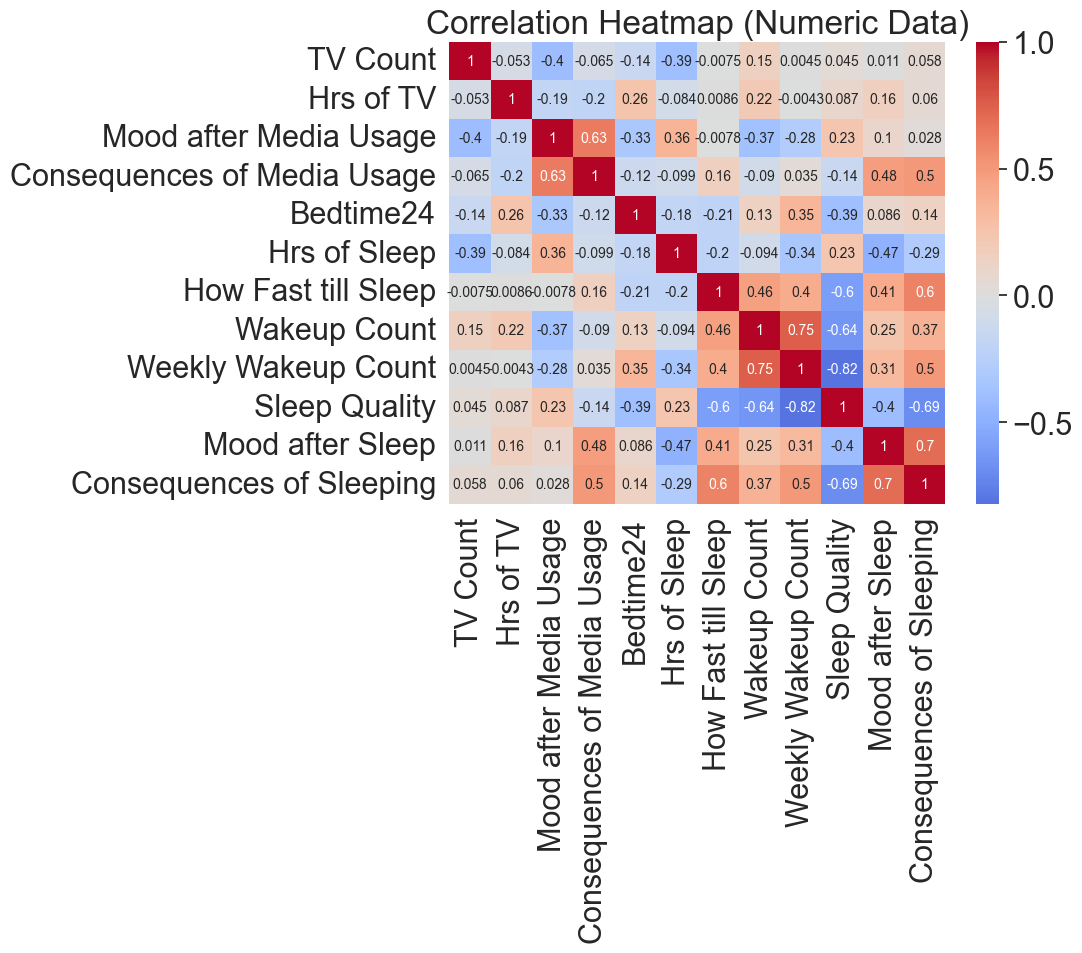

In [13]:
# Quick stats
print(df_numeric.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", center=0, annot_kws={"size": 10})
plt.title("Correlation Heatmap (Numeric Data)")
plt.show()

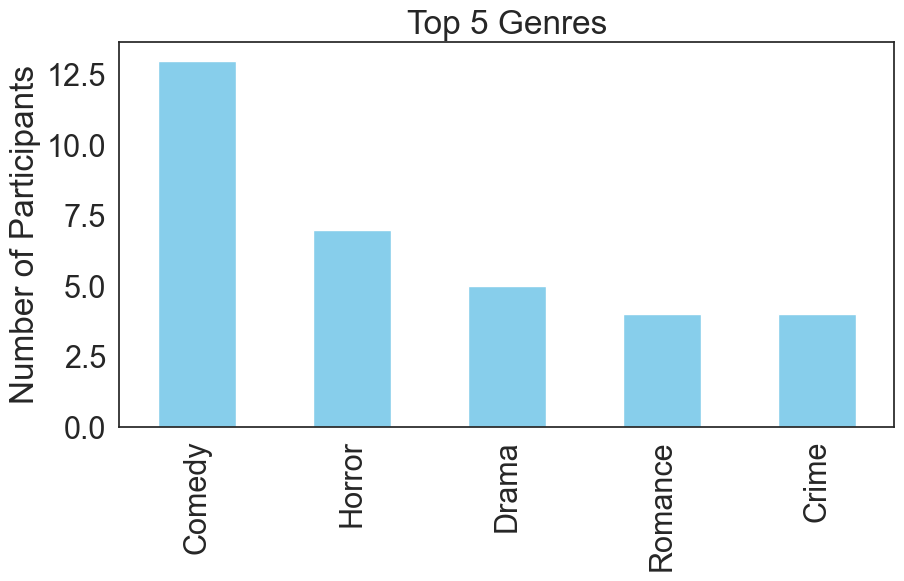

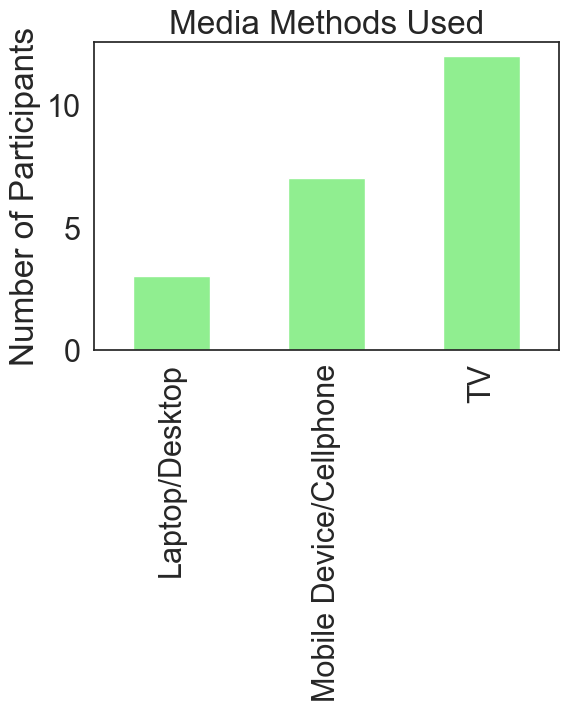

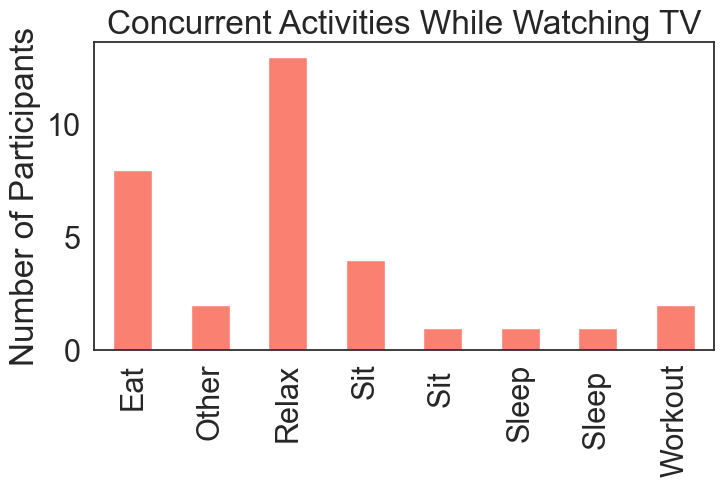

In [14]:
# Top 5 Genres
top_genres = df_genres.sum().sort_values(ascending=False).head(5)
top_genres.plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Top 5 Genres")
plt.ylabel("Number of Participants")
plt.show()

# Media Method frequency
df_media.sum().plot(kind="bar", figsize=(6,4), color="lightgreen")
plt.title("Media Methods Used")
plt.ylabel("Number of Participants")
plt.show()

# Concurrent Activities frequency
df_activities.sum().plot(kind="bar", figsize=(8,4), color="salmon")
plt.title("Concurrent Activities While Watching TV")
plt.ylabel("Number of Participants")
plt.show()


Laptop/Desktop: 8.17h
Mobile Device/Cellphone: 10.21h
TV: 4.58h


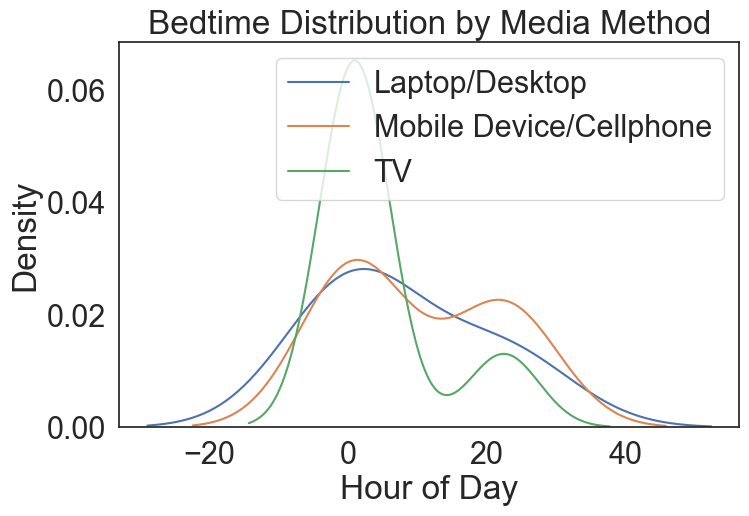

In [15]:
# Average bedtime by Media Method
for col in df_media.columns:
    avg_bedtime = df_numeric["Bedtime24"][df_media[col] == 1].mean()
    print(f"{col}: {avg_bedtime:.2f}h")


plt.figure(figsize=(8,5))
for col in df_media.columns:
    sns.kdeplot(df_numeric["Bedtime24"][df_media[col]==1], label=col)
plt.legend()
plt.title("Bedtime Distribution by Media Method")
plt.xlabel("Hour of Day")
plt.show()
